In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn
seaborn.set()

def to_timestamp(d):
    return d.timestamp()

In [2]:
data = pd.read_csv('dog_rates_tweets.csv', parse_dates =['created_at'])

In [3]:
rate_match = data.text.str.extract(r'(\d+(\.\d+)?)/10', expand=False) # str.extract() reference: https://www.jianshu.com/p/2e9b0a56405a

In [4]:
rate_data = rate_match[rate_match[0].notnull()][0]

In [5]:
rate_data = pd.to_numeric(rate_data)

In [6]:
rate_data = rate_data[rate_data <= 25]

In [7]:
data['rating'] = rate_data 

In [8]:
final = data.dropna(subset = ['rating'])
final = final.loc[rate_data.index]

In [9]:
final['created_at'] = pd.to_datetime(final['created_at'], format='%Y-%m-%d %H:%M:%S')    # https://stackoverflow.com/questions/37042922/datetime-strptime-in-python-pandas-whats-wrong

In [10]:
final['timestamp'] = final['created_at'].apply(to_timestamp)

In [11]:
fit_line = stats.linregress(final['timestamp'], final['rating'])
final['prediction']  = final['timestamp']*fit_line.slope + fit_line.intercept


In [12]:
fit_line.slope, fit_line.intercept

(3.515929974847721e-08, -40.46415480898916)

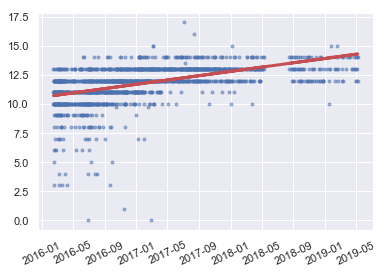

In [13]:
plt.xticks(rotation=25)
plt.plot(final['created_at'].values, final['rating'], 'b.', alpha=0.5)
plt.plot(final['created_at'].values, final['timestamp']*fit_line.slope + fit_line.intercept, 'r-', linewidth=3)
plt.savefig('dog-rates-result.png')

In [14]:
fit_line.pvalue

1.5139606492959894e-106

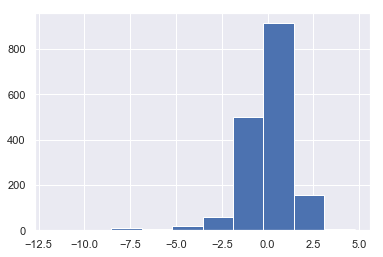

In [15]:
plt.hist((final['rating']-final['prediction']));

In [16]:
stats.normaltest(final['rating']-final['prediction']).pvalue

2.07953030594431e-192